# Case_Study_3_Logistic_Regression_pd5306

In [2]:
pip install mord --quiet

Note: you may need to restart the kernel to use updated packages.


In [32]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from mord import LogisticIT
from sklearn.model_selection import train_test_split
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm

%matplotlib inline   
import matplotlib.pylab as plt

In [33]:
# Create data frame for Flight delays data set. 
flight_df = pd.read_csv('FlightDelays.csv')

# Show the Riding Mower data frame.
print(flight_df)

      SCH_TIME CARRIER  DEP_TIME DEST  DISTANCE  FL_NUM ORIGIN  WEATHER  \
0         1455      OH      1455  JFK       184    5935    BWI        0   
1         1640      DH      1640  JFK       213    6155    DCA        0   
2         1245      DH      1245  LGA       229    7208    IAD        0   
3         1715      DH      1709  LGA       229    7215    IAD        0   
4         1039      DH      1035  LGA       229    7792    IAD        0   
...        ...     ...       ...  ...       ...     ...    ...      ...   
2196       645      RU       644  EWR       199    2761    DCA        0   
2197      1700      RU      1653  EWR       213    2497    IAD        0   
2198      1600      RU      1558  EWR       199    2361    DCA        0   
2199      1359      RU      1403  EWR       199    2216    DCA        0   
2200      1730      RU      1736  EWR       199    2097    DCA        0   

      WK_DAY  MTH_DAY FL_STATUS  
0          4        1    ontime  
1          4        1    ontime

In [34]:
print("Number of rows in the dataframe: ", flight_df.shape[0])
print("Number of columns in the dataframe: ", flight_df.shape[1])
print("Shape of the dataframe (rows , columns):", flight_df.shape)

Number of rows in the dataframe:  2201
Number of columns in the dataframe:  11
Shape of the dataframe (rows , columns): (2201, 11)


In [35]:
flight_df = flight_df.drop(columns = ['DEST', 'ORIGIN'])#Drop irrelevant columns 
flight_df

,SCH_TIME,CARRIER,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS
0,1455,OH,1455,184,5935,0,4,1,ontime
1,1640,DH,1640,213,6155,0,4,1,ontime
2,1245,DH,1245,229,7208,0,4,1,ontime
3,1715,DH,1709,229,7215,0,4,1,ontime
4,1039,DH,1035,229,7792,0,4,1,ontime
...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,199,2761,0,6,31,ontime
2197,1700,RU,1653,213,2497,0,6,31,ontime
2198,1600,RU,1558,199,2361,0,6,31,ontime
2199,1359,RU,1403,199,2216,0,6,31,ontime


In [36]:
print("Columns data types in flight_df data frame:")
flight_df.dtypes

Columns data types in flight_df data frame:


SCH_TIME      int64
CARRIER      object
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS    object
dtype: object

In [37]:
# flight_df.FL_STATUS = flight_df.FL_STATUS.astype("category") 
# print(flight_df.FL_STATUS.cat.categories)
# print(flight_df.FL_STATUS.dtype)

In [38]:
flight_df.CARRIER = flight_df.CARRIER.astype("category") 
print(flight_df.CARRIER.cat.categories)
print(flight_df.CARRIER.dtype)

flight_df.FL_STATUS = flight_df.FL_STATUS.astype("category") 
print(flight_df.FL_STATUS.cat.categories)
print(flight_df.FL_STATUS.dtype)

Index(['CO', 'DH', 'DL', 'MQ', 'OH', 'RU', 'UA', 'US'], dtype='object')
category
Index(['delayed', 'ontime'], dtype='object')
category


In [39]:
flight_df = pd.get_dummies(flight_df, prefix_sep='_', drop_first = True)
print(f"List of {len(flight_df.columns)} columns including outcome variable:")
flight_df.columns

List of 15 columns including outcome variable:


Index(['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
       'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
       'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'FL_STATUS_ontime'],
      dtype='object')

In [40]:
print("Modified data types of columns in data frame:")
flight_df.dtypes

Modified data types of columns in data frame:


SCH_TIME            int64
DEP_TIME            int64
DISTANCE            int64
FL_NUM              int64
WEATHER             int64
WK_DAY              int64
MTH_DAY             int64
CARRIER_DH          uint8
CARRIER_DL          uint8
CARRIER_MQ          uint8
CARRIER_OH          uint8
CARRIER_RU          uint8
CARRIER_UA          uint8
CARRIER_US          uint8
FL_STATUS_ontime    uint8
dtype: object

In [41]:
flight_df.count() #no missing values 

SCH_TIME            2201
DEP_TIME            2201
DISTANCE            2201
FL_NUM              2201
WEATHER             2201
WK_DAY              2201
MTH_DAY             2201
CARRIER_DH          2201
CARRIER_DL          2201
CARRIER_MQ          2201
CARRIER_OH          2201
CARRIER_RU          2201
CARRIER_UA          2201
CARRIER_US          2201
FL_STATUS_ontime    2201
dtype: int64

In [42]:
print("Modified data frame:")
flight_df.head(10)

Modified data frame:


,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,FL_STATUS_ontime
0,1455,1455,184,5935,0,4,1,0,0,0,1,0,0,0,1
1,1640,1640,213,6155,0,4,1,1,0,0,0,0,0,0,1
2,1245,1245,229,7208,0,4,1,1,0,0,0,0,0,0,1
3,1715,1709,229,7215,0,4,1,1,0,0,0,0,0,0,1
4,1039,1035,229,7792,0,4,1,1,0,0,0,0,0,0,1
5,840,839,228,7800,0,4,1,1,0,0,0,0,0,0,1
6,1240,1243,228,7806,0,4,1,1,0,0,0,0,0,0,1
7,1645,1644,228,7810,0,4,1,1,0,0,0,0,0,0,1
8,1715,1710,228,7812,0,4,1,1,0,0,0,0,0,0,1
9,2120,2129,228,7814,0,4,1,1,0,0,0,0,0,0,1


In [54]:
print(f"The {((len(flight_df['FL_STATUS_ontime'][flight_df.FL_STATUS_ontime==0])/len(flight_df))*100)} percent of records have FL_STATUS as delayed")

The 19.445706497046796 percent of records have FL_STATUS as delayed


## Develop and run logistic regression for Flight delay data using multiple predictors.

In [17]:
# Create predictors X and outcome y variables.
X = flight_df.drop(columns=['FL_STATUS_ontime'])
y = flight_df['FL_STATUS_ontime']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

print("Number of records of training and valid/testing data are: ", len(train_X), "and", len(valid_X), "\n")

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# Parameter C=1e42 and penalty=l2 lead to ordinal logistic regression. 
# solver='liblinear' is used for automated selection of the best parameters
# of the logistis regression; recommended for large-scale classification.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Number of records of training and valid/testing data are:  1320 and 881 

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.051
Coefficients for Predictors
        SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  \
Coeff:     0.033    -0.034     0.009     0.0   -0.247   0.097   -0.021   

        CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  \
Coeff:        0.35       0.782      -1.054       0.236       -0.05   

        CARRIER_UA  CARRIER_US  
Coeff:       0.053      -0.043  


In [18]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
1276       1               1  0.1392  0.8608
1446       1               1  0.0795  0.9205
335        1               1  0.0916  0.9084
1458       1               1  0.1136  0.8864
2038       1               1  0.0738  0.9262
1314       1               1  0.0672  0.9328
389        1               1  0.1599  0.8401
1639       1               1  0.1263  0.8737
2004       1               1  0.0951  0.9049
403        1               1  0.3002  0.6998
979        1               1  0.0488  0.9512
65         1               1  0.0691  0.9309
2105       1               1  0.1434  0.8566
1162       1               1  0.1037  0.8963
572        1               1  0.3036  0.6964
1026       0               1  0.0649  0.9351
1044       1               0  0.5242  0.4758
1846       0               1  0.4611  0.5389
1005       1               1  0.1545  0.8455
1677       1               1  0.0503  0.9497


In [19]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9015)

       Prediction
Actual    0    1
     0  141  120
     1   10 1049

Validation Partition
Confusion Matrix (Accuracy 0.8990)

       Prediction
Actual   0   1
     0  90  77
     1  12 702


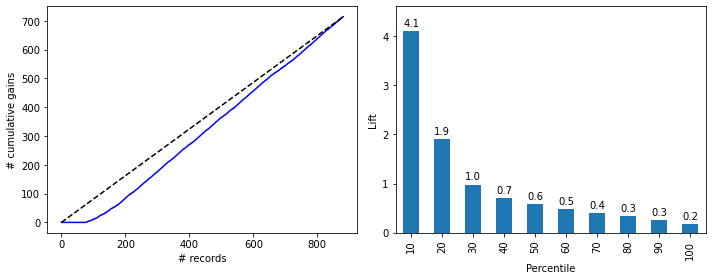

In [29]:
# Develop and display Gains chart and Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(0)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
# In the Gains chart, the 'lift' over the base curve 
# indicates for a given number of cases (on x-axis), 
# the additional responders that you can identify 
# by using the logistic regression model.
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 0's' 
# yields 4.1 times as many 0's as would simply selecting 
# 10% of the records at random.
liftChart(df['p(0)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

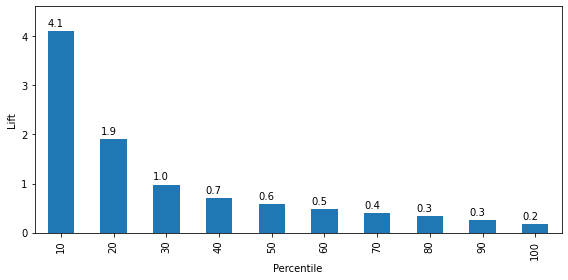

In [19]:
# Develop and display Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(0)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 0's' 
# yields 4.1 times as many 0's as would simply selecting 
# 10% of the records at random.
liftChart(df['p(0)'], title=False)
 
# Display the charts. 
plt.tight_layout()
plt.show()

## Best predictors using Backward elimination algorithm:

In [55]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(max_iter = 500) #LogisticRegrassion with 500 iterations
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: SCH_TIME, DEP_TIME, DISTANCE, FL_NUM, WEATHER, WK_DAY, MTH_DAY, CARRIER_DH, CARRIER_DL, CARRIER_MQ, CARRIER_OH, CARRIER_RU, CARRIER_UA, CARRIER_US
Start: score=692.43
Step: score=608.59, remove FL_NUM


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Step: score=586.78, remove WK_DAY
Step: score=575.73, remove CARRIER_RU
Step: score=575.73, remove None

Best Variables from Backward Elimination Algorithm
['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'WEATHER', 'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_UA', 'CARRIER_US']


In [56]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(max_iter = 600) #Increased to 600 iterations as instructed in the warning message 
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: SCH_TIME, DEP_TIME, DISTANCE, FL_NUM, WEATHER, WK_DAY, MTH_DAY, CARRIER_DH, CARRIER_DL, CARRIER_MQ, CARRIER_OH, CARRIER_RU, CARRIER_UA, CARRIER_US
Start: score=692.43
Step: score=608.59, remove FL_NUM
Step: score=586.78, remove WK_DAY
Step: score=575.73, remove CARRIER_RU
Step: score=575.73, remove None

Best Variables from Backward Elimination Algorithm
['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'WEATHER', 'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_UA', 'CARRIER_US']


In [58]:
# Develop the Logistic regression model based
# on the Backward Elimination results.

# Identify predictors and outcome of the regression model.
predictors_be = ['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'WEATHER', 'MTH_DAY', 'CARRIER_DH', 
                 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_UA', 'CARRIER_US']
outcome = 'FL_STATUS_ontime'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = flight_df[predictors_be]
y = flight_df[outcome]
train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create logistic regression model using X and y.
flight_be = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
flight_be.fit(train_X_be, train_y_be)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Logistic Regression Model for Training Set Using Backward Elimination')
print()
print('Intercept ', np.round(flight_be.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(flight_be.coef_[0], 2)}))

Logistic Regression Model for Training Set Using Backward Elimination

Intercept  [0.1]
     Predictor  Coefficient
0     SCH_TIME         0.03
1     DEP_TIME        -0.03
2     DISTANCE         0.01
3      WEATHER        -0.36
4      MTH_DAY        -0.02
5   CARRIER_DH         0.31
6   CARRIER_DL         0.87
7   CARRIER_MQ        -1.17
8   CARRIER_OH         0.32
9   CARRIER_UA         0.09
10  CARRIER_US        -0.05


In [59]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y_be, flight_be.predict(train_X_be))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y_be, flight_be.predict(valid_X_be))

Training Partition
Confusion Matrix (Accuracy 0.9030)

       Prediction
Actual    0    1
     0  146  115
     1   13 1046

Validation Partition
Confusion Matrix (Accuracy 0.8978)

       Prediction
Actual   0   1
     0  87  80
     1  10 704
